In [1]:
import pandas as pd
%matplotlib inline

In [2]:
patient = pd.read_csv('data/Train/Patient_Profile.csv', low_memory=False)
patient.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,None,80,24-Nov-02,H,Others


In [3]:
trial2data = pd.read_csv('trial2_data.csv', low_memory=False)

In [4]:
# patient_cols = ['Patient_ID', 'First_Interaction', 'City_Type']
patient_cols = ['Patient_ID', 'First_Interaction', 'Online_Follower', 'LinkedIn_Shared',
                'Twitter_Shared', 'Facebook_Shared']
patient_filtered = patient[patient_cols]

In [5]:
# patient_filtered.City_Type = patient_filtered.City_Type.fillna('Z')

In [6]:
patient_filtered['first_interaction_day'] = patient_filtered.First_Interaction.apply(lambda x: str(x).split('-')[0])
patient_filtered['first_interaction_month'] = patient_filtered.First_Interaction.apply(lambda x: str(x).split('-')[1])
patient_filtered['first_interaction_year'] = patient_filtered.First_Interaction.apply(lambda x: str(x).split('-')[2])

/home/jayant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/jayant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/jayant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [7]:
months = {'jan': 1,
          'feb': 2,
          'mar': 3,
          'apr':4,
          'may':5,
          'jun':6,
          'jul':7,
          'aug':8,
          'sep':9,
          'oct':10,
          'nov':11,
          'dec':12}

patient_filtered['first_interaction_month'] = patient_filtered['first_interaction_month'].apply(lambda x: months[x.lower()])
patient_filtered['first_interaction_day'] = patient_filtered['first_interaction_day'].apply(int)
patient_filtered['first_interaction_year'] = patient_filtered['first_interaction_year'].apply(lambda x: int('20'+x))

/home/jayant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jayant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jayant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [8]:
del patient_filtered['First_Interaction']

In [9]:
patient_filtered.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,first_interaction_day,first_interaction_month,first_interaction_year
0,516956,0,0,0,0,18,6,2003
1,507733,0,0,0,0,20,7,2003
2,508307,0,0,0,0,2,11,2002
3,512612,0,0,0,0,2,11,2002
4,521075,0,0,0,0,24,11,2002


In [10]:
trial3data = pd.merge(trial2data, patient_filtered, on='Patient_ID', how='left')

In [14]:
trial3data['combined_var'] = trial3data.Var1 + trial3data.Var2 + trial3data.Var3 + trial3data.Var4 + trial3data.Var5

In [16]:
del trial3data['Var1']
del trial3data['Var2']
del trial3data['Var3']
del trial3data['Var4']
del trial3data['Var5']

In [18]:
trial3data.head()

,Patient_ID,Health_Camp_ID,target,day,month,year,days_active,Category1_First,Category1_Second,Category1_Third,...,Category3_1,Category3_2,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,first_interaction_day,first_interaction_month,first_interaction_year,combined_var
0,489652,6578,1.0,10,9,2005,59,0.0,0.0,1.0,...,0.0,1.0,0,0,0,0,6,12,2004,6
1,507246,6578,0.0,18,8,2005,59,0.0,0.0,1.0,...,0.0,1.0,0,0,0,0,8,9,2004,57
2,491371,6578,0.0,24,7,2005,59,0.0,0.0,1.0,...,0.0,1.0,0,0,0,0,4,3,2003,0
3,485995,6578,1.0,1,10,2005,59,0.0,0.0,1.0,...,0.0,1.0,0,0,0,0,30,9,2005,0
4,511519,6578,1.0,26,9,2005,59,0.0,0.0,1.0,...,0.0,1.0,0,0,0,0,19,9,2005,0


In [19]:
target_data = trial3data

In [20]:
trainset = target_data[0:75278]
testset = target_data[75278:]

In [21]:
import xgboost as xgb

In [22]:
partial_trainset = trainset[trainset['year'].isin([2004, 20005])]
validation_set = trainset[trainset['year'].isin([2006, 2007])]

train_cols = [col for col in trainset.columns if col not in ['target', 'Patient_ID', 'Health_Camp_ID']]
X_train = partial_trainset[train_cols]
Y_train = partial_trainset['target']

X_val = validation_set[train_cols]
Y_val = validation_set['target']

X_test = testset[train_cols]
Y_test = testset['target']

dtrain = xgb.DMatrix(X_train.as_matrix(), label=Y_train.as_matrix(), feature_names=X_train.columns)
dtest = xgb.DMatrix(X_test.as_matrix(), label=Y_test.as_matrix(), feature_names=X_test.columns)
dval = xgb.DMatrix(X_val.as_matrix(), label=Y_val.as_matrix(), feature_names=X_val.columns)

watchlist = [(dtrain, 'train'), (dval, 'eval')]

In [23]:
params = {}
params["objective"] = "binary:logistic"
params["eta"] = 0.003
params["min_child_weight"] = 1
params["subsample"] = 0.8
# params["colsample_bytree"] = 0.8
params["scale_pos_weight"] = 1.0
# params["silent"] = 1
params["max_depth"] = 5
params["nthread"] = 4
params["eval_metric"] = "auc"

In [24]:
num_rounds = 500
model = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	train-auc:0.730982	eval-auc:0.511717
[1]	train-auc:0.737113	eval-auc:0.543019
[2]	train-auc:0.737799	eval-auc:0.768481
[3]	train-auc:0.739950	eval-auc:0.768923
[4]	train-auc:0.739847	eval-auc:0.768183
[5]	train-auc:0.741184	eval-auc:0.767964
[6]	train-auc:0.741893	eval-auc:0.747250
[7]	train-auc:0.742539	eval-auc:0.742879
[8]	train-auc:0.742637	eval-auc:0.742292
[9]	train-auc:0.742384	eval-auc:0.741967
[10]	train-auc:0.742549	eval-auc:0.676622
[11]	train-auc:0.744713	eval-auc:0.678848
[12]	train-auc:0.744144	eval-auc:0.671422
[13]	train-auc:0.745098	eval-auc:0.644413
[14]	train-auc:0.744913	eval-auc:0.641852
[15]	train-auc:0.745911	eval-auc:0.642933
[16]	train-auc:0.745677	eval-auc:0.643255
[17]	train-auc:0.745804	eval-auc:0.643092
[18]	train-auc:0.745872	eval-auc:0.642343
[19]	train-auc:0.745728	eval-auc:0.642263
[20]	train-auc:0.746293	eval-auc:0.740157
[21]	train-auc:0.746804	eval-auc:0.739854
[22]	train-auc:0.747153	eval-auc:0.737967
[23]	train-auc:0.746835	eval-auc:0.737497
[2

In [18]:
model.best_iteration

499

In [19]:
model.get_dump(with_stats=True)

['0:[Category2_C<-1.00136e-05] yes=1,no=2,missing=1,gain=448.22,cover=3839.75\n\t1:[month<10.5] yes=3,no=4,missing=3,gain=105.928,cover=3651.25\n\t\t3:[Var1<4.5] yes=7,no=8,missing=7,gain=76.4788,cover=2195.75\n\t\t\t7:[month<2.5] yes=15,no=16,missing=15,gain=47.2896,cover=2119.5\n\t\t\t\t15:[first_interaction_month<6.5] yes=29,no=30,missing=29,gain=15.8543,cover=642\n\t\t\t\t\t29:leaf=-0.00516552,cover=509.5\n\t\t\t\t\t30:leaf=-0.00391011,cover=132.5\n\t\t\t\t16:[day<18.5] yes=31,no=32,missing=31,gain=35.3687,cover=1477.5\n\t\t\t\t\t31:leaf=-0.00348948,cover=818.75\n\t\t\t\t\t32:leaf=-0.00444487,cover=658.75\n\t\t\t8:[day<15.5] yes=17,no=18,missing=17,gain=13.878,cover=76.25\n\t\t\t\t17:[first_interaction_year<2002.5] yes=33,no=34,missing=33,gain=7.06231,cover=36.25\n\t\t\t\t\t33:leaf=-0.00286957,cover=4.75\n\t\t\t\t\t34:leaf=0.000738462,cover=31.5\n\t\t\t\t18:[Var1<16.5] yes=35,no=36,missing=36,gain=11.5357,cover=40\n\t\t\t\t\t35:leaf=-0.00311278,cover=32.25\n\t\t\t\t\t36:leaf=0.0008

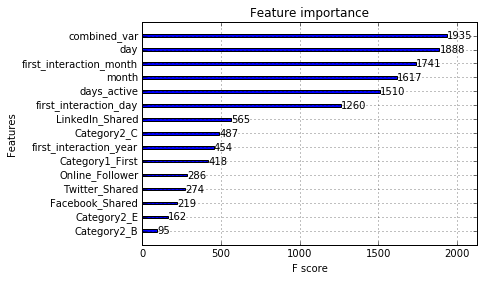

In [25]:
xgb.plot_importance(model)

In [26]:
predictions = model.predict(dtest)
submission = testset[['Patient_ID', 'Health_Camp_ID']]
submission['Outcome'] = predictions

/home/jayant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [27]:
submission.head()

,Patient_ID,Health_Camp_ID,Outcome
75278,505701,6548,0.320420
75279,494067,6548,0.490329
75280,499854,6548,0.507528
75281,509140,6548,0.470894
75282,486481,6548,0.507528


In [28]:
submission.to_csv('trial_3_submission.csv', index=False)

In [29]:
target_data.to_csv('trial3_data.csv', index=False)

In [26]:
help(xgb.plotting)

Help on module xgboost.plotting in xgboost:

NAME
    xgboost.plotting - Plotting Library.

FUNCTIONS
    plot_importance(booster, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance', xlabel='F score', ylabel='Features', grid=True, **kwargs)
        Plot importance based on fitted trees.
        
        Parameters
        ----------
        booster : Booster, XGBModel or dict
            Booster or XGBModel instance, or dict taken by Booster.get_fscore()
        ax : matplotlib Axes, default None
            Target axes instance. If None, new figure and axes will be created.
        height : float, default 0.2
            Bar height, passed to ax.barh()
        xlim : tuple, default None
            Tuple passed to axes.xlim()
        ylim : tuple, default None
            Tuple passed to axes.ylim()
        title : str, default "Feature importance"
            Axes title. To disable, pass None.
        xlabel : str, default "F score"
            X axis title label. 

In [30]:
target_data.columns

Index(['Patient_ID', 'Health_Camp_ID', 'target', 'day', 'month', 'year',
       'days_active', 'Category1_First', 'Category1_Second', 'Category1_Third',
       'Category2_A', 'Category2_B', 'Category2_C', 'Category2_D',
       'Category2_E', 'Category2_F', 'Category2_G', 'Category3_1',
       'Category3_2', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'first_interaction_day', 'first_interaction_month',
       'first_interaction_year', 'combined_var'],
      dtype='object')

In [32]:
len(target_data.columns)

27